In [62]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay

plt.rcParams['font.size'] = 8
plt.rcParams['font.weight'] = 'bold'  # NEW
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'  

In [63]:
import model

In [64]:
def get_data(df, time_idx, idx):
    x = []
    y = []
    z = []
    for (b, a, _, _), data in df.items():
        x.append(b)
        y.append(a)
        tmp1 = data[idx]
        tmp2 = []
        for j in range(len(tmp1)):
            tmp2.append(tmp1[j][time_idx, 1])
        z.append(tmp2)
    return np.array(x), np.array(y), np.array(z)

In [82]:
def plot_3d_triangulated_mesh(x, y, z, zlim=None, filename='', xlabel='X', ylabel='Y', zlabel='Z', title='', ylim=[0.1, 0.125, 0.15, 0.175, 0.2]):
    """
    Plots a 3D triangulated surface from 1D x, y, z arrays.

    Parameters:
    - x, y, z: 1D arrays of the same length
    - xlabel, ylabel, zlabel: Axis labels
    - title: Title of the plot
    """
    x = np.asarray(x)
    y = np.asarray(y)
    z = np.asarray(z)

    if not (x.shape == y.shape == z.shape):
        raise ValueError("x, y, z must have the same shape")

    # Combine x and y to form 2D points for triangulation
    points2D = np.vstack((x, y)).T
    tri = Delaunay(points2D)

    fig = plt.figure(figsize=(2.75, 2.75))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(x, y, z, triangles=tri.simplices, cmap='viridis', edgecolor='w', alpha=0.9, lw=0.05)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_title(title)
    ax.set_zlim(zlim)
    ax.view_init(elev=30, azim=135, roll=0)
    ax.set_xticks([-0.1, -0.05, 0, 0.05, 0.1])
    ax.set_yticks([0.1, 0.125,  0.15, 0.175, 0.2])
    fig.subplots_adjust(left=0.05, right=0.75)
    #plt.tight_layout()
    if filename:
        plt.savefig(filename, dpi=300) #, bbox_inches='tight')
    return ax

In [83]:
df = pickle.load(open('/home/francesco/NeuronGrowth/sim_data_0.1.pkl', 'rb'))

(860,) (860,) (860, 100)


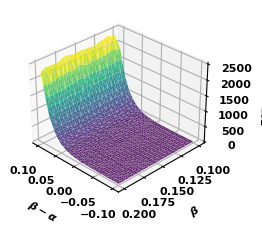

(860,) (860,) (860, 100)


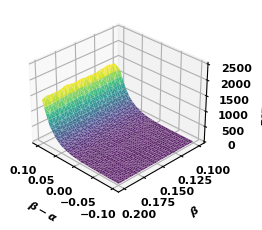

(860,) (860,) (860, 100)


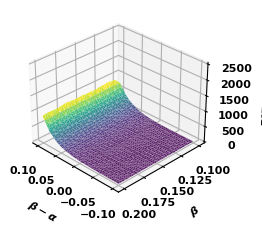

In [84]:
x, y, z = get_data(df, 9, 0)
zmax = round(np.mean(z, axis=1).max() / 500) * 500
print(x.shape, y.shape, z.shape)
ax = plot_3d_triangulated_mesh(y, x, np.mean(z, axis=1), [0, zmax], 'mean9.png', r"$\beta-\alpha$", r"$\beta$", r"E[Z(x)]")
plt.show()

x, y, z = get_data(df, 8, 0)
print(x.shape, y.shape, z.shape)
ax = plot_3d_triangulated_mesh(y, x, np.mean(z, axis=1), [0,zmax], 'mean8.png', r"$\beta-\alpha$", r"$\beta$", r"E[Z(x)]")
plt.show()

x, y, z = get_data(df, 7, 0)
print(x.shape, y.shape, z.shape)
ax = plot_3d_triangulated_mesh(y, x, np.mean(z, axis=1), [0,zmax], 'mean7.png', r"$\beta-\alpha$", r"$\beta$", r"E[Z(x)]")
plt.show()

(860,) (860,) (860, 100)


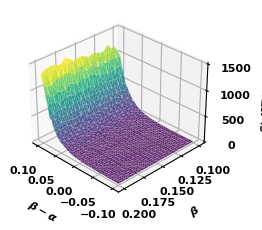

(860,) (860,) (860, 100)


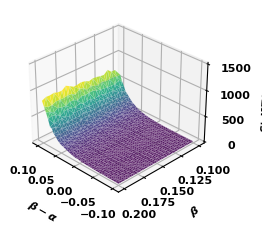

(860,) (860,) (860, 100)


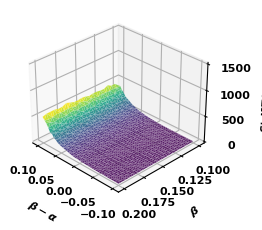

In [85]:
x, y, z = get_data(df, 9, 0)
print(x.shape, y.shape, z.shape)

zmax = round(np.std(z, axis=1).max() / 500) * 500
ax = plot_3d_triangulated_mesh(y, x, np.std(z, axis=1), [0, zmax], 'var9.png', r"$\beta-\alpha$", r"$\beta$", r"Std[Z(x)]")
plt.show()

x, y, z = get_data(df, 8, 0)
print(x.shape, y.shape, z.shape)
ax = plot_3d_triangulated_mesh(y, x, np.std(z, axis=1), [0, zmax], 'var8.png', r"$\beta-\alpha$", r"$\beta$", r"Std[Z(x)]")
plt.show()

x, y, z = get_data(df, 7, 0)
print(x.shape, y.shape, z.shape)
ax = plot_3d_triangulated_mesh(y, x, np.std(z, axis=1), [0, zmax], 'var7.png', r"$\beta-\alpha$", r"$\beta$", r"Std[Z(x)]")
plt.show()

(860,) (860,) (860, 100)


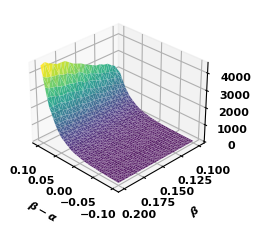

(860,) (860,) (860, 100)


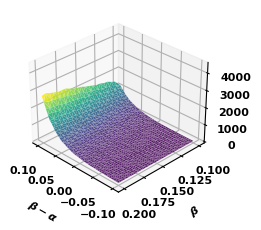

(860,) (860,) (860, 100)


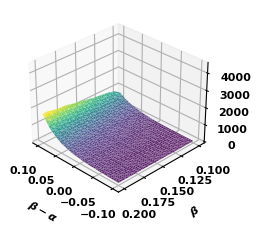

In [87]:
x, y, z = get_data(df, 9, 1)
print(x.shape, y.shape, z.shape)
zmax = round(np.mean(z, axis=1).max() / 500) * 500
ax = plot_3d_triangulated_mesh(y, x, np.mean(z, axis=1), [0,zmax], 'meanb9.png', xlabel=r"$\beta-\alpha$", ylabel=r"$\beta$", zlabel=r"E[B(x)]")
plt.show()

x, y, z = get_data(df, 8, 1)
print(x.shape, y.shape, z.shape)
ax = plot_3d_triangulated_mesh(y, x, np.mean(z, axis=1), [0,zmax], 'meanb8.png', xlabel=r"$\beta-\alpha$", ylabel=r"$\beta$", zlabel=r"E[B(x)]")
plt.show()

x, y, z = get_data(df, 7, 1)
print(x.shape, y.shape, z.shape)
ax = plot_3d_triangulated_mesh(y, x, np.mean(z, axis=1), [0,zmax], 'meanb7.png', xlabel=r"$\beta-\alpha$", ylabel=r"$\beta$", zlabel=r"E[B(x)]")
plt.show()

(860,) (860,) (860, 100)


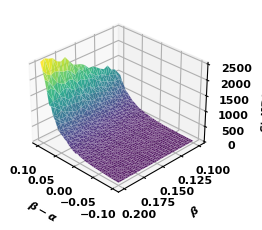

(860,) (860,) (860, 100)


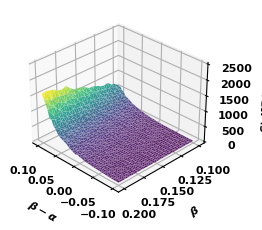

(860,) (860,) (860, 100)


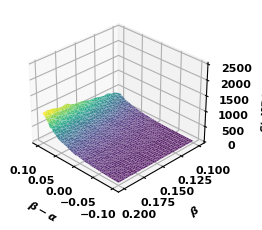

In [88]:
x, y, z = get_data(df, 9, 1)
print(x.shape, y.shape, z.shape)
zmax = round(np.std(z, axis=1).max() / 500) * 500
ax = plot_3d_triangulated_mesh(y, x, np.std(z, axis=1), [0, zmax], 'varb9.png', r"$\beta-\alpha$", r"$\beta$", r"Std[B(x)]")
plt.show()

x, y, z = get_data(df, 8, 1)
print(x.shape, y.shape, z.shape)
ax = plot_3d_triangulated_mesh(y, x, np.std(z, axis=1), [0, zmax], 'varb8.png', r"$\beta-\alpha$", r"$\beta$", r"Std[B(x)]")
plt.show()

x, y, z = get_data(df, 7, 1)
print(x.shape, y.shape, z.shape)
ax = plot_3d_triangulated_mesh(y, x, np.std(z, axis=1), [0, zmax], 'varb7.png', r"$\beta-\alpha$", r"$\beta$", r"Std[B(x)]")
plt.show()